# Prediction of prices in Beijing
* url: https://www.kaggle.com/datasets/ruiqurm/lianjia

# Import all the libraries and check its version

In [1]:
import sys # To check pyhton version
import pandas as pd
pd.set_option('display.max_columns', None) # Show all the columns of the DataFrame.
import numpy as np
import os

In [2]:
print(f"Python version: {sys.version}")
print(f"OS version: {os.name}")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

Python version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
OS version: posix
Pandas version: 2.0.3
Numpy version: 1.21.5


## Data path

In [3]:
main_path = "/home/andres/Proyectos/Python/Machine Learning/Housing price Beijing"
file_name = "housing_beijing.csv"
path = os.path.join(main_path, file_name)

#### Columns of the dataset
* url: the url which fetches the data
* id: the id of transaction
* Lng: and Lat coordinates, using the BD09 protocol.
* Cid: community id
* tradeTime: the time of transaction
* DOM: active days on market.Know more in https://en.wikipedia.org/wiki/Days_on_market
* followers: the number of people follow the transaction.
* totalPrice: the total price
* price: the average price by square
* square: the square of house
* livingRoom: the number of living room
* drawingRoom: the number of drawing room
* kitchen: the number of kitchen
* bathroom the number of bathroom
* floor: the height of the house.
* buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).
* constructionTime: the time of construction
* renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )
* buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).
* ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.
* elevator have ( 1 ) or not have elevator( 0 )
* fiveYearsProperty: if the owner have the property for less than 5 years.

Most data is traded in 2011-2017, some of them is traded in Jan,2018, and some is even earlier(2010,2009)

All the data was fetching from https://bj.lianjia.com/chengjiao. 

Some columns are missing a description.


## Exploratory analysis of the dataset

In [4]:
# dtype = str: We make all columns str to avoid problems loading the data.
# low_memory = False: If there are missing values or mixed data types, it may require more memory for type inference.
# encoding = 'gbk': To read chinesse characters.
data = pd.read_csv(path, encoding = 'gbk', dtype = str, low_memory = False)
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.01952,1111027376244,2016-08-09,1464,106,415.0,31680,131.0,2,1,1,1,高 26,1,2005,3,6,0.217,1.0,0.0,1.0,7,56021
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903,126,575.0,43436,132.38,2,2,1,2,高 22,1,2004,4,6,0.667,1.0,1.0,0.0,7,71539
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271,48,1030.0,52021,198.0,3,2,1,3,中 4,4,2005,3,6,0.5,1.0,0.0,0.0,7,48160
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.43801,40.076114,1111043185817,2016-09-30,965,138,297.5,22202,134.0,3,1,1,1,底 21,1,2008,1,6,0.273,1.0,0.0,0.0,6,51238
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927,286,392.0,48396,81.0,2,1,1,1,中 6,4,1960,2,2,0.333,0.0,1.0,1.0,1,62588


In [5]:
data.shape

(318851, 26)

In [6]:
data.dtypes

url                    object
id                     object
Lng                    object
Lat                    object
Cid                    object
tradeTime              object
DOM                    object
followers              object
totalPrice             object
price                  object
square                 object
livingRoom             object
drawingRoom            object
kitchen                object
bathRoom               object
floor                  object
buildingType           object
constructionTime       object
renovationCondition    object
buildingStructure      object
ladderRatio            object
elevator               object
fiveYearsProperty      object
subway                 object
district               object
communityAverage       object
dtype: object

The dataset has one problem, the column 'totalPrice' which correspond to the total price is lesser than the 'price'
column, which is the pricer per square. The reason for this is because the 'totalPrice' column does not have all the
digits, so we are goint to drop the column and create a new 'Price' column multiplying the 'price' columun with the
'square' column, we are going to do the following steps:
* Drop the 'totalPrice' column.
* Convert the 'price' and 'square' columns data type to float (right now they are objects).
* Create the 'Price (M)' column multiplying  the 'price' and 'square' columns and normalizing it to 1,000,000 with 3 decimals so it is easier to read it.

In [7]:
# Step 1
data = data.drop('totalPrice', axis = 1)
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.01952,1111027376244,2016-08-09,1464,106,31680,131.0,2,1,1,1,高 26,1,2005,3,6,0.217,1.0,0.0,1.0,7,56021
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903,126,43436,132.38,2,2,1,2,高 22,1,2004,4,6,0.667,1.0,1.0,0.0,7,71539
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271,48,52021,198.0,3,2,1,3,中 4,4,2005,3,6,0.5,1.0,0.0,0.0,7,48160
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.43801,40.076114,1111043185817,2016-09-30,965,138,22202,134.0,3,1,1,1,底 21,1,2008,1,6,0.273,1.0,0.0,0.0,6,51238
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927,286,48396,81.0,2,1,1,1,中 6,4,1960,2,2,0.333,0.0,1.0,1.0,1,62588


In [8]:
data.shape

(318851, 25)

In [9]:
# Step 2
data['price'] = data['price'].astype(float)
data['square'] = data['square'].astype(float)
data.dtypes

url                     object
id                      object
Lng                     object
Lat                     object
Cid                     object
tradeTime               object
DOM                     object
followers               object
price                  float64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                 object
bathRoom                object
floor                   object
buildingType            object
constructionTime        object
renovationCondition     object
buildingStructure       object
ladderRatio             object
elevator                object
fiveYearsProperty       object
subway                  object
district                object
communityAverage        object
dtype: object

In [10]:
# Step 3
data['Price (M)'] = round(data['price'] * data['square'] / 1000000, 3)
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,Price (M)
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.01952,1111027376244,2016-08-09,1464,106,31680.0,131.00,2,1,1,1,高 26,1,2005,3,6,0.217,1.0,0.0,1.0,7,56021,4.150
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903,126,43436.0,132.38,2,2,1,2,高 22,1,2004,4,6,0.667,1.0,1.0,0.0,7,71539,5.750
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271,48,52021.0,198.00,3,2,1,3,中 4,4,2005,3,6,0.5,1.0,0.0,0.0,7,48160,10.300
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.43801,40.076114,1111043185817,2016-09-30,965,138,22202.0,134.00,3,1,1,1,底 21,1,2008,1,6,0.273,1.0,0.0,0.0,6,51238,2.975
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927,286,48396.0,81.00,2,1,1,1,中 6,4,1960,2,2,0.333,0.0,1.0,1.0,1,62588,3.920


### Create a subset with the desired columns
Not all the columns are useful, we are going to stay with all the columns that bring some value.

In [11]:
columns = data.columns.values.tolist()
columns

['url',
 'id',
 'Lng',
 'Lat',
 'Cid',
 'tradeTime',
 'DOM',
 'followers',
 'price',
 'square',
 'livingRoom',
 'drawingRoom',
 'kitchen',
 'bathRoom',
 'floor',
 'buildingType',
 'constructionTime',
 'renovationCondition',
 'buildingStructure',
 'ladderRatio',
 'elevator',
 'fiveYearsProperty',
 'subway',
 'district',
 'communityAverage',
 'Price (M)']

In [12]:
# Create the desired subset
columns_set = set(columns)
columns_subset = {'url', 'Cid', 'tradeTime', 'id', 'communityAverage', 'price', 'followers', 'district'}
desired_columns = columns_set - columns_subset
desired_columns = list(desired_columns)
desired_columns

['floor',
 'drawingRoom',
 'square',
 'elevator',
 'subway',
 'ladderRatio',
 'constructionTime',
 'livingRoom',
 'Lat',
 'renovationCondition',
 'bathRoom',
 'kitchen',
 'buildingType',
 'fiveYearsProperty',
 'Price (M)',
 'buildingStructure',
 'Lng',
 'DOM']

In [13]:
# Create a new DataFrame using the desired columns
desired_data = data[desired_columns]
desired_data.head()

,floor,drawingRoom,square,elevator,subway,ladderRatio,constructionTime,livingRoom,Lat,renovationCondition,bathRoom,kitchen,buildingType,fiveYearsProperty,Price (M),buildingStructure,Lng,DOM
0,高 26,1,131.00,1.0,1.0,0.217,2005,2,40.01952,3,1,1,1,0.0,4.150,6,116.475489,1464
1,高 22,2,132.38,1.0,0.0,0.667,2004,2,39.881534,4,2,1,1,1.0,5.750,6,116.453917,903
2,中 4,2,198.00,1.0,0.0,0.5,2005,3,39.877145,3,3,1,4,0.0,10.300,6,116.561978,1271
3,底 21,1,134.00,1.0,0.0,0.273,2008,3,40.076114,1,1,1,1,0.0,2.975,6,116.43801,965
4,中 6,1,81.00,0.0,1.0,0.333,1960,2,39.886229,2,1,1,4,1.0,3.920,2,116.428392,927


### Renaming the columns

In [14]:
desired_data = desired_data.rename(columns = {'ladderRatio': 'Ladder Ratio',
                                  'fiveYearsProperty': 'Five Years Property', 'square': 'Square',  
                                  'livingRoom': 'Living Room', 'bathRoom': 'Bathroom', 'kitchen': 'Kitchen',
                                   'buildingType': 'Building Type', 'buildingStructure': 'Building Structure',
                                  'elevator': 'Elevator', 'constructionTime': 'Construction Time', 
                                  'renovationCondition': 'Renovation Condition',
                                  'subway': 'Subway', 'drawingRoom': 'Drawing Room', 'floor': 'Floor'})

In [15]:
desired_data.head()

,Floor,Drawing Room,Square,Elevator,Subway,Ladder Ratio,Construction Time,Living Room,Lat,Renovation Condition,Bathroom,Kitchen,Building Type,Five Years Property,Price (M),Building Structure,Lng,DOM
0,高 26,1,131.00,1.0,1.0,0.217,2005,2,40.01952,3,1,1,1,0.0,4.150,6,116.475489,1464
1,高 22,2,132.38,1.0,0.0,0.667,2004,2,39.881534,4,2,1,1,1.0,5.750,6,116.453917,903
2,中 4,2,198.00,1.0,0.0,0.5,2005,3,39.877145,3,3,1,4,0.0,10.300,6,116.561978,1271
3,底 21,1,134.00,1.0,0.0,0.273,2008,3,40.076114,1,1,1,1,0.0,2.975,6,116.43801,965
4,中 6,1,81.00,0.0,1.0,0.333,1960,2,39.886229,2,1,1,4,1.0,3.920,2,116.428392,927


In [16]:
columns = desired_data.columns.values.tolist()
columns

['Floor',
 'Drawing Room',
 'Square',
 'Elevator',
 'Subway',
 'Ladder Ratio',
 'Construction Time',
 'Living Room',
 'Lat',
 'Renovation Condition',
 'Bathroom',
 'Kitchen',
 'Building Type',
 'Five Years Property',
 'Price (M)',
 'Building Structure',
 'Lng',
 'DOM']

### Dealing with annoying values
Let's create a function that trys to convert the values to int or float and if it fails, stored those values in a dictionary.

In [17]:
# Finds the unique values for each column if the conversion to int or float fails.
def findValues(columns_list):
    data_copy = desired_data.copy() # Create a copy of the dataset.
    values_dict = {}
    for col in columns_list:
        try:
            data_copy[col] = data_copy[col].astype(int)
        except ValueError: # If it is a float value
            try:
                data_copy[col] = data_copy[col].astype(float)
            except ValueError: # If there is a non number value.
                col_list = []
                for i in data_copy[col].unique().tolist():
                    try:
                        int(i)
                    except ValueError:
                        try:
                            float(i)
                        except ValueError:
                            col_list.append(i)
                values_dict[col] = col_list
    return values_dict

In [18]:
# Create a DataFrame using values_dict
series_list = []
for col, values in findValues(columns).items():
    series_list.append(pd.Series(values, name = col))

# Concatenate the series in a DataFrame
df = pd.concat(series_list, axis=1)
df

,Floor,Drawing Room,Construction Time,Living Room,Bathroom
0,高 26,中 14,未知,#NAME?,未知
1,高 22,中 15,NaN,NaN,NaN
2,中 4,中 16,NaN,NaN,NaN
3,底 21,中 6,NaN,NaN,NaN
4,中 6,高 14,NaN,NaN,NaN
...,...,...,...,...,...
198,未知 29,NaN,NaN,NaN,NaN
199,未知 24,NaN,NaN,NaN,NaN
200,未知 30,NaN,NaN,NaN,NaN
201,未知 31,NaN,NaN,NaN,NaN


In [19]:
# Look for the frequency of certain values
def frequencyValues(values_dict):
    freq_dict = {}
    for key, value in values_dict.items():
        for l in value:
            # Stored the column, value and relative frequency in a tuple.
            freq_dict[(key, l)] = ((desired_data[key] == l).sum(), ((desired_data[key] == l).sum() / desired_data.shape[0]) * 100)
    return freq_dict

In [20]:
frequencyValues(findValues(columns))

{('Floor', '高 26'): (1820, 0.5707995270518205),
 ('Floor', '高 22'): (2540, 0.7966103289624308),
 ('Floor', '中 4'): (1598, 0.5011745297960489),
 ('Floor', '底 21'): (289, 0.09063794687800886),
 ('Floor', '中 6'): (34788, 10.910425245647653),
 ('Floor', '中 8'): (1202, 0.3769785887452133),
 ('Floor', '高 6'): (20904, 6.556040282138052),
 ('Floor', '高 10'): (1193, 0.37415595372133065),
 ('Floor', '中 23'): (1484, 0.465421152826869),
 ('Floor', '底 11'): (676, 0.21201125290496187),
 ('Floor', '底 3'): (639, 0.20040708669566665),
 ('Floor', '高 24'): (4014, 1.2588952206516524),
 ('Floor', '低 23'): (839, 0.26313230944861393),
 ('Floor', '中 19'): (1868, 0.5858535805125278),
 ('Floor', '高 18'): (6536, 2.049860279566318),
 ('Floor', '低 25'): (1777, 0.5573136041599367),
 ('Floor', '中 12'): (3196, 1.0023490595920979),
 ('Floor', '中 14'): (3993, 1.252309072262593),
 ('Floor', '中 30'): (862, 0.27034571006520286),
 ('Floor', '中 27'): (1709, 0.5359870284239346),
 ('Floor', '中 5'): (8227, 2.5802020379424873),

From the above dictionary we can see that the 'Floor' column has too many combined data (kanji + number), so we are going to drop that column. The other columns have too little rows with combined data, so we can drop them, the only exception is going to be the 'Construction Time' wich only has one value '未知' that means unknown, about 6% of the data has this value so instead of dropping the rows, we are going to give them a random value choose among the other values that are known.

In [21]:
# Drop 'Floor' column.
desired_data = desired_data.drop('Floor', axis = 1)
desired_data.head()

,Drawing Room,Square,Elevator,Subway,Ladder Ratio,Construction Time,Living Room,Lat,Renovation Condition,Bathroom,Kitchen,Building Type,Five Years Property,Price (M),Building Structure,Lng,DOM
0,1,131.00,1.0,1.0,0.217,2005,2,40.01952,3,1,1,1,0.0,4.150,6,116.475489,1464
1,2,132.38,1.0,0.0,0.667,2004,2,39.881534,4,2,1,1,1.0,5.750,6,116.453917,903
2,2,198.00,1.0,0.0,0.5,2005,3,39.877145,3,3,1,4,0.0,10.300,6,116.561978,1271
3,1,134.00,1.0,0.0,0.273,2008,3,40.076114,1,1,1,1,0.0,2.975,6,116.43801,965
4,1,81.00,0.0,1.0,0.333,1960,2,39.886229,2,1,1,4,1.0,3.920,2,116.428392,927


In [22]:
# Drop the rows.
columns = desired_data.columns.values.tolist()
dict_keys_object = frequencyValues(findValues(columns)).keys() # Access to the keys values (tuple).
keys_list = list(dict_keys_object) # Transform the dictionary into a list to  iterate.
for i in keys_list: # i is a tuple with the values (column, value, Relative frequency %)
    if i[0] != 'Construction Time':
    # We drop the rows in de DataFrame that have the unwanted values.
        desired_data = desired_data[~desired_data[i[0]].eq(i[1])]

In [23]:
frequencyValues(findValues(columns))

{('Construction Time', '未知'): (19283, 6.04825935719013)}

Replace the '未知' values with random values of the 'Construction Time' column.

In [24]:
# Function that replace certain values with random values of the same column.
def randomReplace(data, column, value):
    list_values = data[column].tolist() # Get all the values of the column.
    list_values = [x for x in list_values if x != value] # Update the list without the unwanted value.
    np.random.shuffle(list_values) # Shuffle the list.
    mask = (data[column] == value) # Create a boolean mask for the rows that contain the unwanted value.
    data.loc[mask, column] = np.random.choice(list_values, size = mask.sum()) # Replace the unwanted value for random values from the list.
    return data.head()

In [25]:
randomReplace(desired_data, 'Construction Time', '未知')

,Drawing Room,Square,Elevator,Subway,Ladder Ratio,Construction Time,Living Room,Lat,Renovation Condition,Bathroom,Kitchen,Building Type,Five Years Property,Price (M),Building Structure,Lng,DOM
0,1,131.00,1.0,1.0,0.217,2005,2,40.01952,3,1,1,1,0.0,4.150,6,116.475489,1464
1,2,132.38,1.0,0.0,0.667,2004,2,39.881534,4,2,1,1,1.0,5.750,6,116.453917,903
2,2,198.00,1.0,0.0,0.5,2005,3,39.877145,3,3,1,4,0.0,10.300,6,116.561978,1271
3,1,134.00,1.0,0.0,0.273,2008,3,40.076114,1,1,1,1,0.0,2.975,6,116.43801,965
4,1,81.00,0.0,1.0,0.333,1960,2,39.886229,2,1,1,4,1.0,3.920,2,116.428392,927


In [26]:
frequencyValues(findValues(columns)) # If the dictionay is empty it means all the unwanted values were replaced sucessfully.

{}

### NaN values
Let's see how many rows with NaN values there are in the dataset.

In [27]:
data_copy = desired_data.copy() # Create a copy of the dataset.
data_copy = data_copy.dropna() # Drop NaN rows.
nan_rows = desired_data.shape[0] - data_copy.shape[0]
nan_rows

159284

In [28]:
(nan_rows / desired_data.shape[0]) * 100 # Porcentage of NaN rows.

49.96063597213466

The above analysis show us that almost half of the registers hava at least one NaN in a column, so deleting them will make us lose half of the data, instead, we are going to replace NaN values with somo statistic.

In [29]:
nans = desired_data.isna().sum()
nans

Drawing Room                 0
Square                       0
Elevator                     0
Subway                       0
Ladder Ratio                 0
Construction Time            0
Living Room                  0
Lat                          0
Renovation Condition         0
Bathroom                     0
Kitchen                      0
Building Type             2021
Five Years Property          0
Price (M)                    0
Building Structure           0
Lng                          0
DOM                     157970
dtype: int64

In [30]:
data_copy = desired_data.copy()
# Replace NaNs with 'Building type' mode.
# inplace = True modifies the DataFrame directly, otherwise it creates a copy.
mode_value = data_copy['Building Type'].mode().iloc[0]
data_copy['Building Type'].fillna(value = mode_value, inplace = True) 

In [31]:
nans = data_copy.isna().sum()
nans

Drawing Room                 0
Square                       0
Elevator                     0
Subway                       0
Ladder Ratio                 0
Construction Time            0
Living Room                  0
Lat                          0
Renovation Condition         0
Bathroom                     0
Kitchen                      0
Building Type                0
Five Years Property          0
Price (M)                    0
Building Structure           0
Lng                          0
DOM                     157970
dtype: int64

In [32]:
# Replace NaNs with 'DOM' mean.
# Transform the values to numbers, when the conversion fails, we use coerce to fill them with nans.
data_copy['DOM'] = pd.to_numeric(data_copy['DOM'], errors = 'coerce')
mean_value = int(round(data_copy['DOM'].mean()))
data_copy['DOM'] = data_copy['DOM'].fillna(value = mean_value)

In [33]:
nans = data_copy.isna().sum()
nans

Drawing Room            0
Square                  0
Elevator                0
Subway                  0
Ladder Ratio            0
Construction Time       0
Living Room             0
Lat                     0
Renovation Condition    0
Bathroom                0
Kitchen                 0
Building Type           0
Five Years Property     0
Price (M)               0
Building Structure      0
Lng                     0
DOM                     0
dtype: int64

# Create dummies variables and numeric conversion

In [34]:
data_copy.dtypes

Drawing Room             object
Square                  float64
Elevator                 object
Subway                   object
Ladder Ratio             object
Construction Time        object
Living Room              object
Lat                      object
Renovation Condition     object
Bathroom                 object
Kitchen                  object
Building Type            object
Five Years Property      object
Price (M)               float64
Building Structure       object
Lng                      object
DOM                     float64
dtype: object

In [35]:
data_copy.head()

,Drawing Room,Square,Elevator,Subway,Ladder Ratio,Construction Time,Living Room,Lat,Renovation Condition,Bathroom,Kitchen,Building Type,Five Years Property,Price (M),Building Structure,Lng,DOM
0,1,131.00,1.0,1.0,0.217,2005,2,40.01952,3,1,1,1,0.0,4.150,6,116.475489,1464.0
1,2,132.38,1.0,0.0,0.667,2004,2,39.881534,4,2,1,1,1.0,5.750,6,116.453917,903.0
2,2,198.00,1.0,0.0,0.5,2005,3,39.877145,3,3,1,4,0.0,10.300,6,116.561978,1271.0
3,1,134.00,1.0,0.0,0.273,2008,3,40.076114,1,1,1,1,0.0,2.975,6,116.43801,965.0
4,1,81.00,0.0,1.0,0.333,1960,2,39.886229,2,1,1,4,1.0,3.920,2,116.428392,927.0


Before creating the dummies variables we are going to convert them to numeric values.

In [36]:
columns = data_copy.columns.values.tolist()
for col in columns:
    data_copy[col] = pd.to_numeric(data_copy[col], errors = 'coerce')
data_copy.dtypes

Drawing Room              int64
Square                  float64
Elevator                float64
Subway                  float64
Ladder Ratio            float64
Construction Time         int64
Living Room               int64
Lat                     float64
Renovation Condition      int64
Bathroom                  int64
Kitchen                   int64
Building Type             int64
Five Years Property     float64
Price (M)               float64
Building Structure        int64
Lng                     float64
DOM                     float64
dtype: object

The columns that require dummies variables are the following:
* Building Type: tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).
* Renovation Condition: other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )
* Building Structure: unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).

In [37]:
variables = ['Building Type', 'Renovation Condition', 'Building Structure']
prefix = ['Building_Type', 'Renovation_Condition', 'Building_Structure']
final_data = data_copy
for index in range(3):
    dummy_variables = pd.get_dummies(data_copy[variables[index]], prefix = prefix[index])
    dummy_variables = dummy_variables.astype(int)
    final_data = pd.concat([final_data, dummy_variables], axis = 1)

final_data = final_data.drop(variables, axis = 1)
final_data.head()

,Drawing Room,Square,Elevator,Subway,Ladder Ratio,Construction Time,Living Room,Lat,Bathroom,Kitchen,Five Years Property,Price (M),Lng,DOM,Building_Type_1,Building_Type_2,Building_Type_3,Building_Type_4,Renovation_Condition_1,Renovation_Condition_2,Renovation_Condition_3,Renovation_Condition_4,Building_Structure_1,Building_Structure_2,Building_Structure_3,Building_Structure_4,Building_Structure_5,Building_Structure_6
0,1,131.00,1.0,1.0,0.217,2005,2,40.019520,1,1,0.0,4.150,116.475489,1464.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,132.38,1.0,0.0,0.667,2004,2,39.881534,2,1,1.0,5.750,116.453917,903.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2,198.00,1.0,0.0,0.500,2005,3,39.877145,3,1,0.0,10.300,116.561978,1271.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,1,134.00,1.0,0.0,0.273,2008,3,40.076114,1,1,0.0,2.975,116.438010,965.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1,81.00,0.0,1.0,0.333,1960,2,39.886229,1,1,1.0,3.920,116.428392,927.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0


In [38]:
len(final_data.columns.tolist())

28

# Scatter plots

In [39]:
import matplotlib.pyplot as plt

In [40]:
def scatter_plot(data, *x_col, y_col):
    columns = len(x_col)
    for col in range(columns):
        x_values = data[x_col[col]]
        y_values = data[y_col]
        plt.scatter(x_values, y_values)
        plt.xlabel(x_col[col])
        plt.ylabel(y_col)
        plt.title(f'Scatter Plot - {x_col[col]} vs {y_col}')
        plt.show()

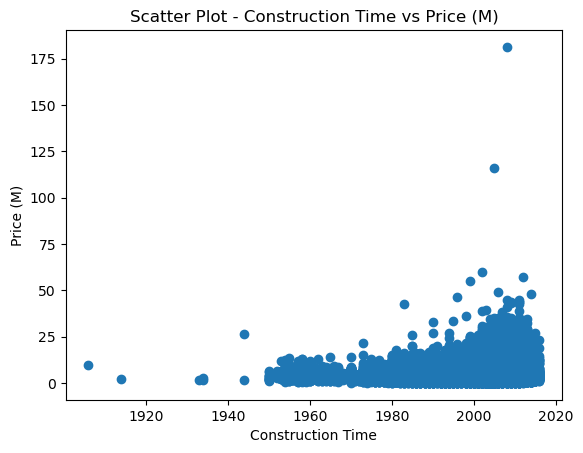

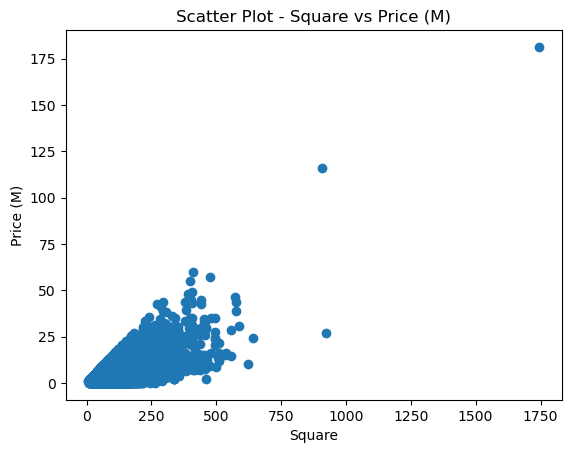

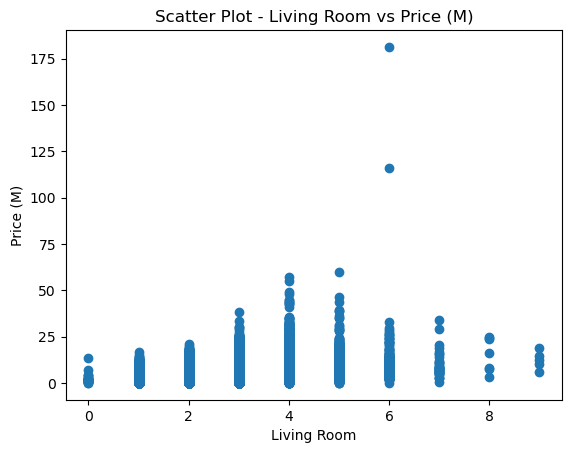

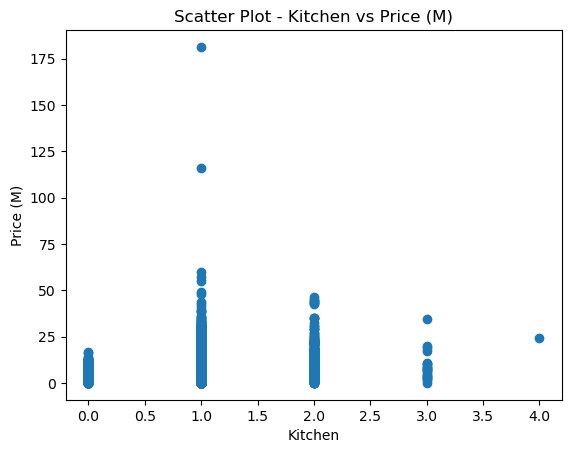

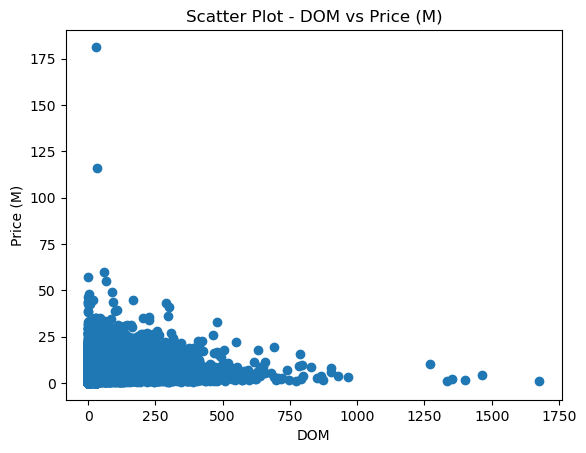

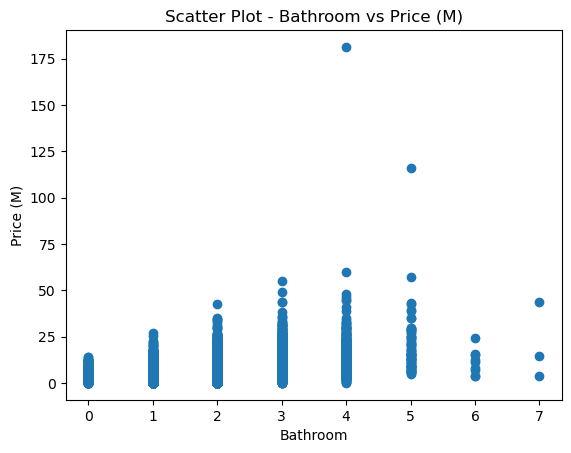

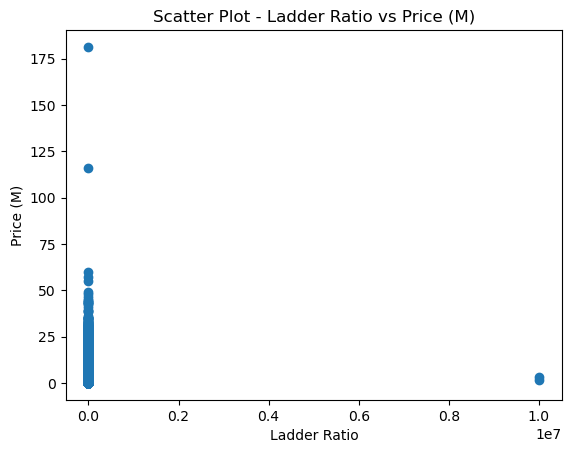

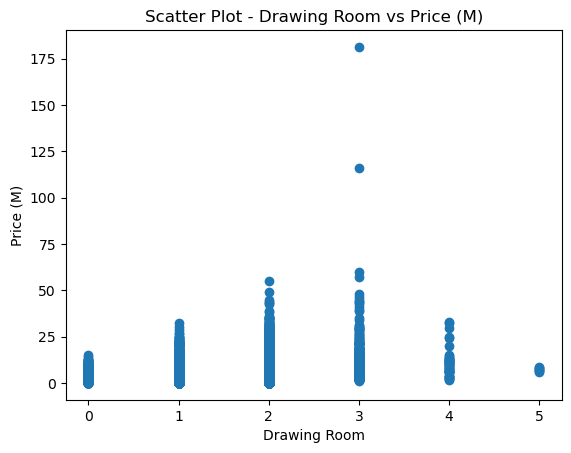

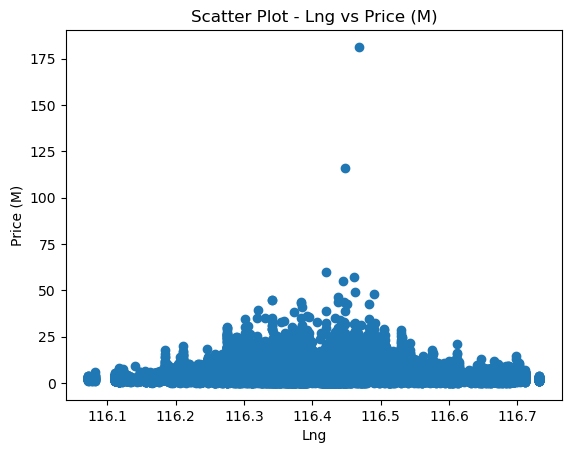

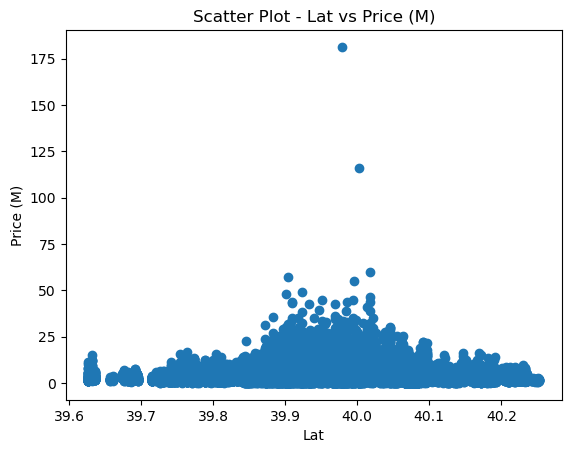

In [41]:
scatter_columns = ['Construction Time', 'Square', 'Living Room', 'Kitchen', 'DOM', 'Bathroom', 'Ladder Ratio',
                  'Drawing Room', 'Lng', 'Lat']
prediction_column = 'Price (M)'
scatter_plot(final_data, *scatter_columns, y_col = prediction_column)

From the graphs we can observe that the only variable following a lineal relationship is Square vs Price, we also see three outliers in that graph, so we are going to get rid of them. We also are going to get rid of all continuous variables except the Square one because is the only one that kind of follows a linear pattern.

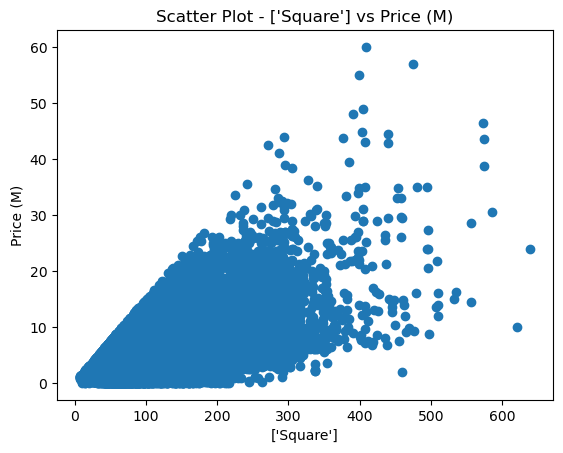

In [42]:
condition = final_data['Square'] > 750
indices = final_data.loc[condition].index
final_data = final_data.drop(indices)
scatter_plot(final_data, ['Square'], y_col = prediction_column)

In [43]:
unwanted_columns = ['Construction Time', 'DOM', 'Ladder Ratio', 'Lng', 'Lat']
final_data = final_data.drop(unwanted_columns, axis = 1)
final_data.head()

,Drawing Room,Square,Elevator,Subway,Living Room,Bathroom,Kitchen,Five Years Property,Price (M),Building_Type_1,Building_Type_2,Building_Type_3,Building_Type_4,Renovation_Condition_1,Renovation_Condition_2,Renovation_Condition_3,Renovation_Condition_4,Building_Structure_1,Building_Structure_2,Building_Structure_3,Building_Structure_4,Building_Structure_5,Building_Structure_6
0,1,131.00,1.0,1.0,2,1,1,0.0,4.150,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,132.38,1.0,0.0,2,2,1,1.0,5.750,1,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2,198.00,1.0,0.0,3,3,1,0.0,10.300,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,1,134.00,1.0,0.0,3,1,1,0.0,2.975,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1,81.00,0.0,1.0,2,1,1,1.0,3.920,0,0,0,1,0,1,0,0,0,1,0,0,0,0


Finally, we verify if there are rows with price equals to zero, if it is the case, we delete the corresponding rows.

In [44]:
(final_data['Price (M)'] == 0).any()

True

In [45]:
with_zeros = final_data.shape[0]
final_data = final_data.loc[final_data['Price (M)'] != 0]
without_zeros = final_data.shape[0]
print(with_zeros - without_zeros)

218


There were 218 rows where the price was zero.

# Linear Regression

In [46]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### First we are going to select the variables for the model

In [47]:
predictors = final_data.columns.values.tolist()
predictors.remove('Price (M)')
predictors

['Drawing Room',
 'Square',
 'Elevator',
 'Subway',
 'Living Room',
 'Bathroom',
 'Kitchen',
 'Five Years Property',
 'Building_Type_1',
 'Building_Type_2',
 'Building_Type_3',
 'Building_Type_4',
 'Renovation_Condition_1',
 'Renovation_Condition_2',
 'Renovation_Condition_3',
 'Renovation_Condition_4',
 'Building_Structure_1',
 'Building_Structure_2',
 'Building_Structure_3',
 'Building_Structure_4',
 'Building_Structure_5',
 'Building_Structure_6']

In [48]:
def variable_selection(data, threshold , *predictors, prediction, n):
    predictors = list(predictors)
    # We will use a sample in order to increase the performace:
    sample_size = round(len(data) * threshold)
    sample_data = data.sample(n = sample_size)
    X = sample_data[predictors]
    Y = sample_data[prediction]

    # Select the variables:
    estimator = SVR(kernel = "linear")
    selector = RFE(estimator, n_features_to_select = n, step = 1)
    selector = selector.fit(X,Y)
    # Let's store the data in a dictionary:
    ordered_predictors = {}
    for element in range(len(predictors)):
        ordered_predictors[predictors[element]] = selector.ranking_[element]
    # We order the dictionary by variable relevance:
    ordered_predictors = dict(sorted(ordered_predictors.items(), key = lambda item: item[1]))
    return ordered_predictors

In [49]:
variable_selection(final_data, 0.05, *predictors, prediction = 'Price (M)', n = 1)

{'Bathroom': 1,
 'Building_Type_2': 2,
 'Kitchen': 3,
 'Renovation_Condition_4': 4,
 'Renovation_Condition_3': 5,
 'Living Room': 6,
 'Elevator': 7,
 'Building_Structure_3': 8,
 'Subway': 9,
 'Renovation_Condition_1': 10,
 'Building_Structure_1': 11,
 'Drawing Room': 12,
 'Building_Type_4': 13,
 'Building_Type_1': 14,
 'Building_Type_3': 15,
 'Building_Structure_6': 16,
 'Renovation_Condition_2': 17,
 'Building_Structure_5': 18,
 'Building_Structure_2': 19,
 'Building_Structure_4': 20,
 'Square': 21,
 'Five Years Property': 22}

We can observe two things:
* 1) The Square variable is the least important according to our selection, wich is odd.
* 2) At least one of each dummy variable is among the seven more important variables, so if we use a dummy variable of each category, we have to use the rest of them beacuse they complement each other.

So we are going to use all the dummy variables we created and perform again the selection of variables without them.

In [50]:
dummy_variables = ['Renovation_Condition_1', 'Renovation_Condition_2', 'Renovation_Condition_3',
                  'Renovation_Condition_4', 'Building_Type_1', 'Building_Type_2', 'Building_Type_3',
                  'Building_Type_4', 'Building_Structure_1', 'Building_Structure_2', 'Building_Structure_3',
                  'Building_Structure_4', 'Building_Structure_5', 'Building_Structure_6']
variables = [variable for variable in predictors if variable not in dummy_variables]
variables

['Drawing Room',
 'Square',
 'Elevator',
 'Subway',
 'Living Room',
 'Bathroom',
 'Kitchen',
 'Five Years Property']

In [51]:
ordered_predictors = variable_selection(final_data, 0.05, *variables, prediction = 'Price (M)', n = 1)

In [52]:
ordered_predictors

{'Bathroom': 1,
 'Living Room': 2,
 'Elevator': 3,
 'Kitchen': 4,
 'Subway': 5,
 'Five Years Property': 6,
 'Square': 7,
 'Drawing Room': 8}

### Perform the linear regression
We are going to perform several linear regressions increasing the number of variables to maximize the R². The first iteration is going to be with the variable Bathroom and the dummy variables.

In [53]:
results = {}
for predictor, rank in ordered_predictors.items():
    dummy_variables.append(predictor)
    X = final_data[dummy_variables]
    Y = final_data['Price (M)']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    lm = LinearRegression()
    lm.fit(X_train, Y_train)
    score = lm.score(X_train, Y_train)
    results[rank] = score
print(results)

{1: 0.27656940675754194, 2: 0.3412487920907039, 3: 0.34704865732667867, 4: 0.3469975340006032, 5: 0.3622907465493824, 6: 0.364709682729648, 7: 0.4277948913963012, 8: 0.427167367994325}


We can see that the model tha maximizes the R² statistic is the model that incorporates all dummy variables with the eight predictors.

In [54]:
def linear_statisitcs(Y_test, Y_pred):
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    ape = np.abs((np.array(Y_test) - np.array(Y_pred)) / np.array(Y_test)) * 100
    mape = np.mean(ape)
    statistics = {'Mean Squared Error': [mse], 'R²': [r2], 'Mean Percentual Error': [mape]}
    df_statistics = pd.DataFrame(statistics)
    return df_statistics

In [55]:
Y_pred = lm.predict(X_test)
performance = linear_statisitcs(Y_test = Y_test, Y_pred = Y_pred)
print(performance)

   Mean Squared Error        R²  Mean Percentual Error
0            3.000476  0.427825              45.107487


Base in these statistics we conclude tha a linear regression is not the best model to predict housing prices in Beijing.